In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss

from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Load Data

In [539]:
#1 
df = pd.read_csv('grad.csv')
df.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


# EDA

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [541]:
#2
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [542]:
df.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

In [543]:
#3 crosstab
ctab = pd.crosstab(df.admit, [df['rank']], rownames =['admit'], colnames = ['rank'])
ctab

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


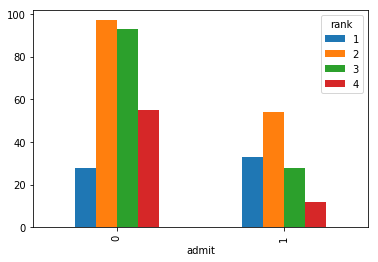

In [544]:
ctab.plot(kind = "bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002821BF52AC8>,
      dtype=object)

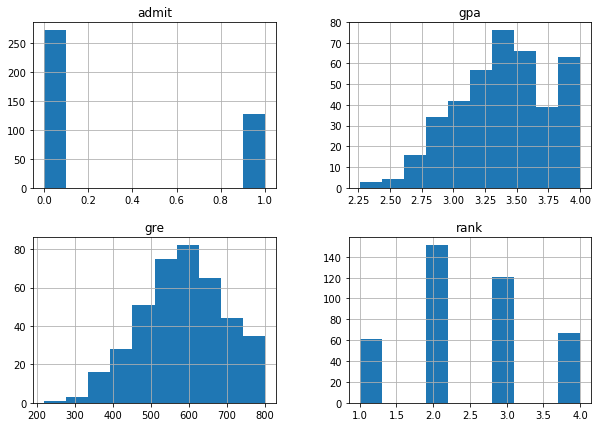

In [545]:
#4 Hist
df.hist(bins=10, figsize= (10, 7))

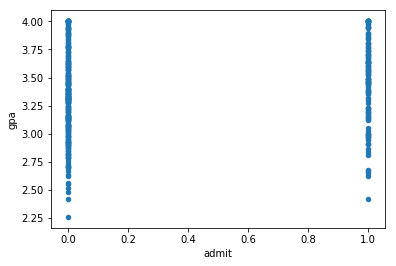

In [546]:
#5 scatterplot 
df1 = df[['admit', 'gpa', 'gre']]
df1.plot.scatter(x ='admit', y = 'gpa')

In [547]:
# data transformations

In [548]:
df[['is_rank1', 'is_rank2', 'is_rank3']] = pd.get_dummies(df['rank']).iloc[:, :-1]
df.head(3)

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3
0,0,380,3.61,3,0,0,1
1,1,660,3.67,3,0,0,1
2,1,800,4.00,1,1,0,0


In [549]:
df['is_gradeA'] = ((df.gpa >= 3.7).astype('uint8'))
df['is_gradeB'] = ((df.gpa >= 2.7) & (df.gpa < 3.7)).astype('uint8')

In [550]:
df.head(10)

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3,is_gradeA,is_gradeB
0,0,380,3.61,3,0,0,1,0,1
1,1,660,3.67,3,0,0,1,0,1
2,1,800,4.00,1,1,0,0,1,0
3,1,640,3.19,4,0,0,0,0,1
4,0,520,2.93,4,0,0,0,0,1
5,1,760,3.00,2,0,1,0,0,1
6,1,560,2.98,1,1,0,0,0,1
7,0,400,3.08,2,0,1,0,0,1
8,1,540,3.39,3,0,0,1,0,1
9,0,700,3.92,2,0,1,0,1,0


In [551]:
df.corr()

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3,is_gradeA,is_gradeB
admit,1.000000,0.184434,0.178212,-0.242513,0.203651,0.067109,-0.121800,0.128627,-0.125354
gre,0.184434,1.000000,0.384266,-0.123447,0.088622,0.056202,-0.073200,0.301333,-0.216118
gpa,0.178212,0.384266,1.000000,-0.057461,0.070550,-0.057867,0.074490,0.726917,-0.508925
rank,-0.242513,-0.123447,-0.057461,1.000000,-0.667808,-0.400397,0.359549,-0.041193,0.046816
is_rank1,0.203651,0.088622,0.070550,-0.667808,1.000000,-0.330334,-0.279354,0.060110,-0.052751
is_rank2,0.067109,0.056202,-0.057867,-0.400397,-0.330334,1.000000,-0.512837,-0.054552,0.036457
is_rank3,-0.121800,-0.073200,0.074490,0.359549,-0.279354,-0.512837,1.000000,0.058598,-0.049231
is_gradeA,0.128627,0.301333,0.726917,-0.041193,0.060110,-0.054552,0.058598,1.000000,-0.905600
is_gradeB,-0.125354,-0.216118,-0.508925,0.046816,-0.052751,0.036457,-0.049231,-0.905600,1.000000


# Predicting Graduate School Admissions
# Get X and y

In [552]:
y = df.admit
X = df[['gre', 'gpa', 'is_rank1', 'is_rank2', 'is_rank3']]

In [553]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [554]:
# scale data 
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)

C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eka06n0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Grid search

In [555]:
# linear regression
params = {'alpha': np.logspace(-4, 5)}
gs = GridSearchCV(Ridge(), param_grid=params, cv=10, n_jobs=5).fit(X_train, y_train)
X_train

array([[ 0.48685357,  0.3213823 , -0.42008403,  1.31089534, -0.68261892],
       [ 0.66252239,  0.6326664 , -0.42008403,  1.31089534, -0.68261892],
       [ 0.31118476,  1.43681698, -0.42008403, -0.7628374 , -0.68261892],
       ...,
       [-1.6211722 , -0.79405238, -0.42008403,  1.31089534, -0.68261892],
       [-0.21582169,  0.52890503, -0.42008403,  1.31089534, -0.68261892],
       [ 0.8381912 , -0.19742453, -0.42008403,  1.31089534, -0.68261892]])

In [556]:
gs.best_params_

{'alpha': 21.209508879201927}

In [557]:
r2_score(y_train, gs.predict(X_train))

0.08756105069223374

# logistic Regression model fitting

In [576]:
y = df.admit
X = df[['gre', 'gpa', 'is_rank1', 'is_rank2', 'is_rank3']]

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [578]:
# scale data NOT WORKING HERE
##scalar = StandardScaler().fit(X_train)
##X_train = scalar.transform(X_train)

In [579]:
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
##model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [580]:
print(model.intercept_, model.coef_)

[-5.48712788] [[0.00192132 0.81365228 1.20245456 0.94196208 0.50943708]]


In [640]:
# y_hat
y_hat = model.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [641]:
model.classes_

array([0, 1], dtype=int64)

In [642]:
accuracy_score(y_test, y_hat)

0.6416666666666667

In [643]:
precision_score(y_test, y_hat)

0.5

In [644]:
confusion_matrix(y_test, y_hat)

array([[73,  4],
       [39,  4]], dtype=int64)

In [645]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77        77
           1       0.50      0.09      0.16        43

   micro avg       0.64      0.64      0.64       120
   macro avg       0.58      0.52      0.46       120
weighted avg       0.60      0.64      0.55       120



# Graph

In [646]:
auc = roc_auc_score(y_test, p_hat)
auc

0.6886137118695257

In [647]:
p_hat = model.predict_proba(X_test)[:,1]
##p_hat

In [648]:
fpr, tpr, thr = roc_curve(y_test, p_hat)

In [649]:
# midpoint
midpoint = ((- model.intercept_[0]) + 0 ) / model.coef_[0][0] 
midpoint

2855.921653959444

In [650]:
X_axis = np.asarray(X_test)[:,1]
X_axis.shape

(120,)

In [651]:
y_axis = np.asarray(y_test).reshape(-1,1)
y_axis.shape

(120, 1)

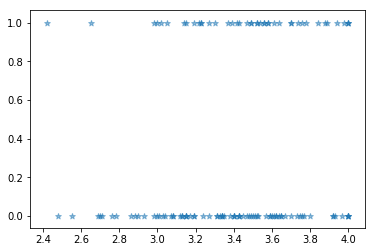

In [655]:
plt.scatter(X_axis, y_axis, marker='*', alpha=0.5)

In [656]:
'''
plt.figure(figsize = (15,8))
plt.scatter(X_axis, y_axis, marker='*', alpha=0.5)
##plt.plot(np.linspace(0, 250), model.predict_proba(np.linspace(0, 250).reshape(50,1))[:,1], label='sigmid', color='r')
plt.axhline(0.5, color='g', alpha=0.5, linestyle='--', dashes=(3,10), label='p(h|w) = 0.5')
plt.axvline(midpoint, color='k', alpha=0.6, linestyle='-.', label='admit cutoff')
plt.xlabel('gre/gpa/rank')
plt.ylabel('p(a|g)')
plt.title('Logistic Regression')
plt.legend()
plt.show()
'''

"\nplt.figure(figsize = (15,8))\nplt.scatter(X_axis, y_axis, marker='*', alpha=0.5)\n##plt.plot(np.linspace(0, 250), model.predict_proba(np.linspace(0, 250).reshape(50,1))[:,1], label='sigmid', color='r')\nplt.axhline(0.5, color='g', alpha=0.5, linestyle='--', dashes=(3,10), label='p(h|w) = 0.5')\nplt.axvline(midpoint, color='k', alpha=0.6, linestyle='-.', label='admit cutoff')\nplt.xlabel('gre/gpa/rank')\nplt.ylabel('p(a|g)')\nplt.title('Logistic Regression')\nplt.legend()\nplt.show()\n"

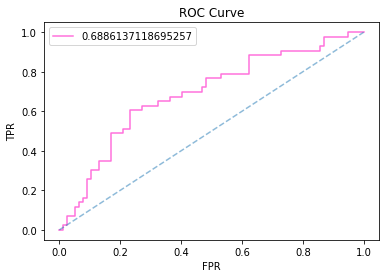

In [657]:
# ROC curve
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()